In [1]:
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
print("Train Shape: ", train.shape)
print("Test Shape: ", test.shape)

Train Shape:  (1460, 81)
Test Shape:  (1459, 80)


In [4]:
df = pd.concat([train,test], axis = 0, sort= False)

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

# Handling Missing Data

In [7]:
def missing_data_summary(df):
    missing_data = df.isnull().sum().sort_values(ascending=False)
    missing_df = missing_data[missing_data>0]
    percentage = (missing_df / len(df)) * 100
    
    missing_summary_df = pd.concat([missing_df,percentage], axis = 1)
    missing_summary_df.columns = ["Column Name","Missing Percentage"]
    
    return missing_summary_df

In [8]:
missing_data = missing_data_summary(df)

In [9]:
missing_data

,Column Name,Missing Percentage
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
SalePrice,1459,49.982871
FireplaceQu,1420,48.646797
LotFrontage,486,16.649538
GarageQual,159,5.447071
GarageYrBlt,159,5.447071
GarageFinish,159,5.447071


Some of the missing value percentages are so high. So we can drop them easily, because we do not want to confuse computer by filling them.

*IMPORTANT NOTE* : Except from Sale Price of course. It is missing because of concat train and test sets

In [10]:
dropped_column_names= ["PoolQC","MiscFeature","Alley","Fence","FireplaceQu"]

In [11]:
df=df.drop(dropped_column_names, axis = 1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

#### Numerical Missing Values

In [13]:
# Lot Frontage
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
lotFrontage = df.iloc[:,3:4].values
imputer = imputer.fit_transform(lotFrontage)
df.LotFrontage = imputer

# GarageYRBlt
df.GarageYrBlt = df.GarageYrBlt.fillna(0)

#MasVnrArea
df.MasVnrArea = df.MasVnrArea.fillna(0)

#BsmtFullBath
df.BsmtFullBath = df.BsmtFullBath.fillna(0)

#BsmtHalfBath
df.BsmtHalfBath = df.BsmtHalfBath.fillna(0)

#GarageArea
df.GarageArea = df.GarageArea.fillna(0)

#BsmtFinSF2
df.BsmtFinSF2 = df.BsmtFinSF2.fillna(0)

#TotalBsmtSF
df.TotalBsmtSF = df.TotalBsmtSF.fillna(0)

#GarageCars
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
cars = df.iloc[:,59:60].values
imputer = imputer.fit_transform(cars)
df.GarageCars = imputer

#BsmtUnfSF
df.BsmtUnfSF = df.BsmtUnfSF.fillna(0)

#BsmtFinSF1
df.BsmtFinSF1 = df.BsmtFinSF1.fillna(0)


In [14]:
missing_data = missing_data_summary(df)
missing_data

,Column Name,Missing Percentage
SalePrice,1459,49.982871
GarageCond,159,5.447071
GarageFinish,159,5.447071
GarageQual,159,5.447071
GarageType,157,5.378554
BsmtExposure,82,2.809181
BsmtCond,82,2.809181
BsmtQual,81,2.774923
BsmtFinType2,80,2.740665
BsmtFinType1,79,2.706406


In [15]:
# GarageCond
df.GarageCond = df.GarageCond.fillna("NA")

# GarageFinish
df.GarageFinish = df.GarageFinish.fillna("NA")

#GarageQual
df.GarageQual = df.GarageQual.fillna("TA")

#GarageType
df.GarageType = df.GarageType.fillna("NA")

#BsmtExposure
df.BsmtExposure = df.BsmtExposure.fillna("NA")

#BsmtCond
df.BsmtCond = df.BsmtCond.fillna("TA")

#BsmtQual
df.BsmtQual = df.BsmtQual.fillna("NA")

#BsmtFinType2
df.BsmtFinType2 = df.BsmtFinType2.fillna("NA")

#BsmtFinType1
df.BsmtFinType1 = df.BsmtFinType1.fillna("NA")

#MasVnrType
df.MasVnrType = df.MasVnrType.fillna("None")

#MSZoning
df['MSZoning'] = df['MSZoning'] .fillna(df['MSZoning'].mode()[0])

#Functional
df['Functional'] = df['Functional'] .fillna(df['Functional'].mode()[0])

#Utilities
df['Utilities'] = df['Utilities'] .fillna(df['Utilities'].mode()[0])

#Exterior2nd
df.Exterior2nd = df.Exterior2nd.fillna("NA")

#SaleType
df['SaleType'] = df['SaleType'] .fillna(df['SaleType'].mode()[0])

#KitchenQual
df.KitchenQual = df.KitchenQual.fillna("TA")

#Exterior1st
df.Exterior1st = df.Exterior1st.fillna("NA")

#Electrical
df['Electrical'] = df['Electrical'] .fillna(df['Electrical'].mode()[0])


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2919 non-null   object 
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

# Visualising

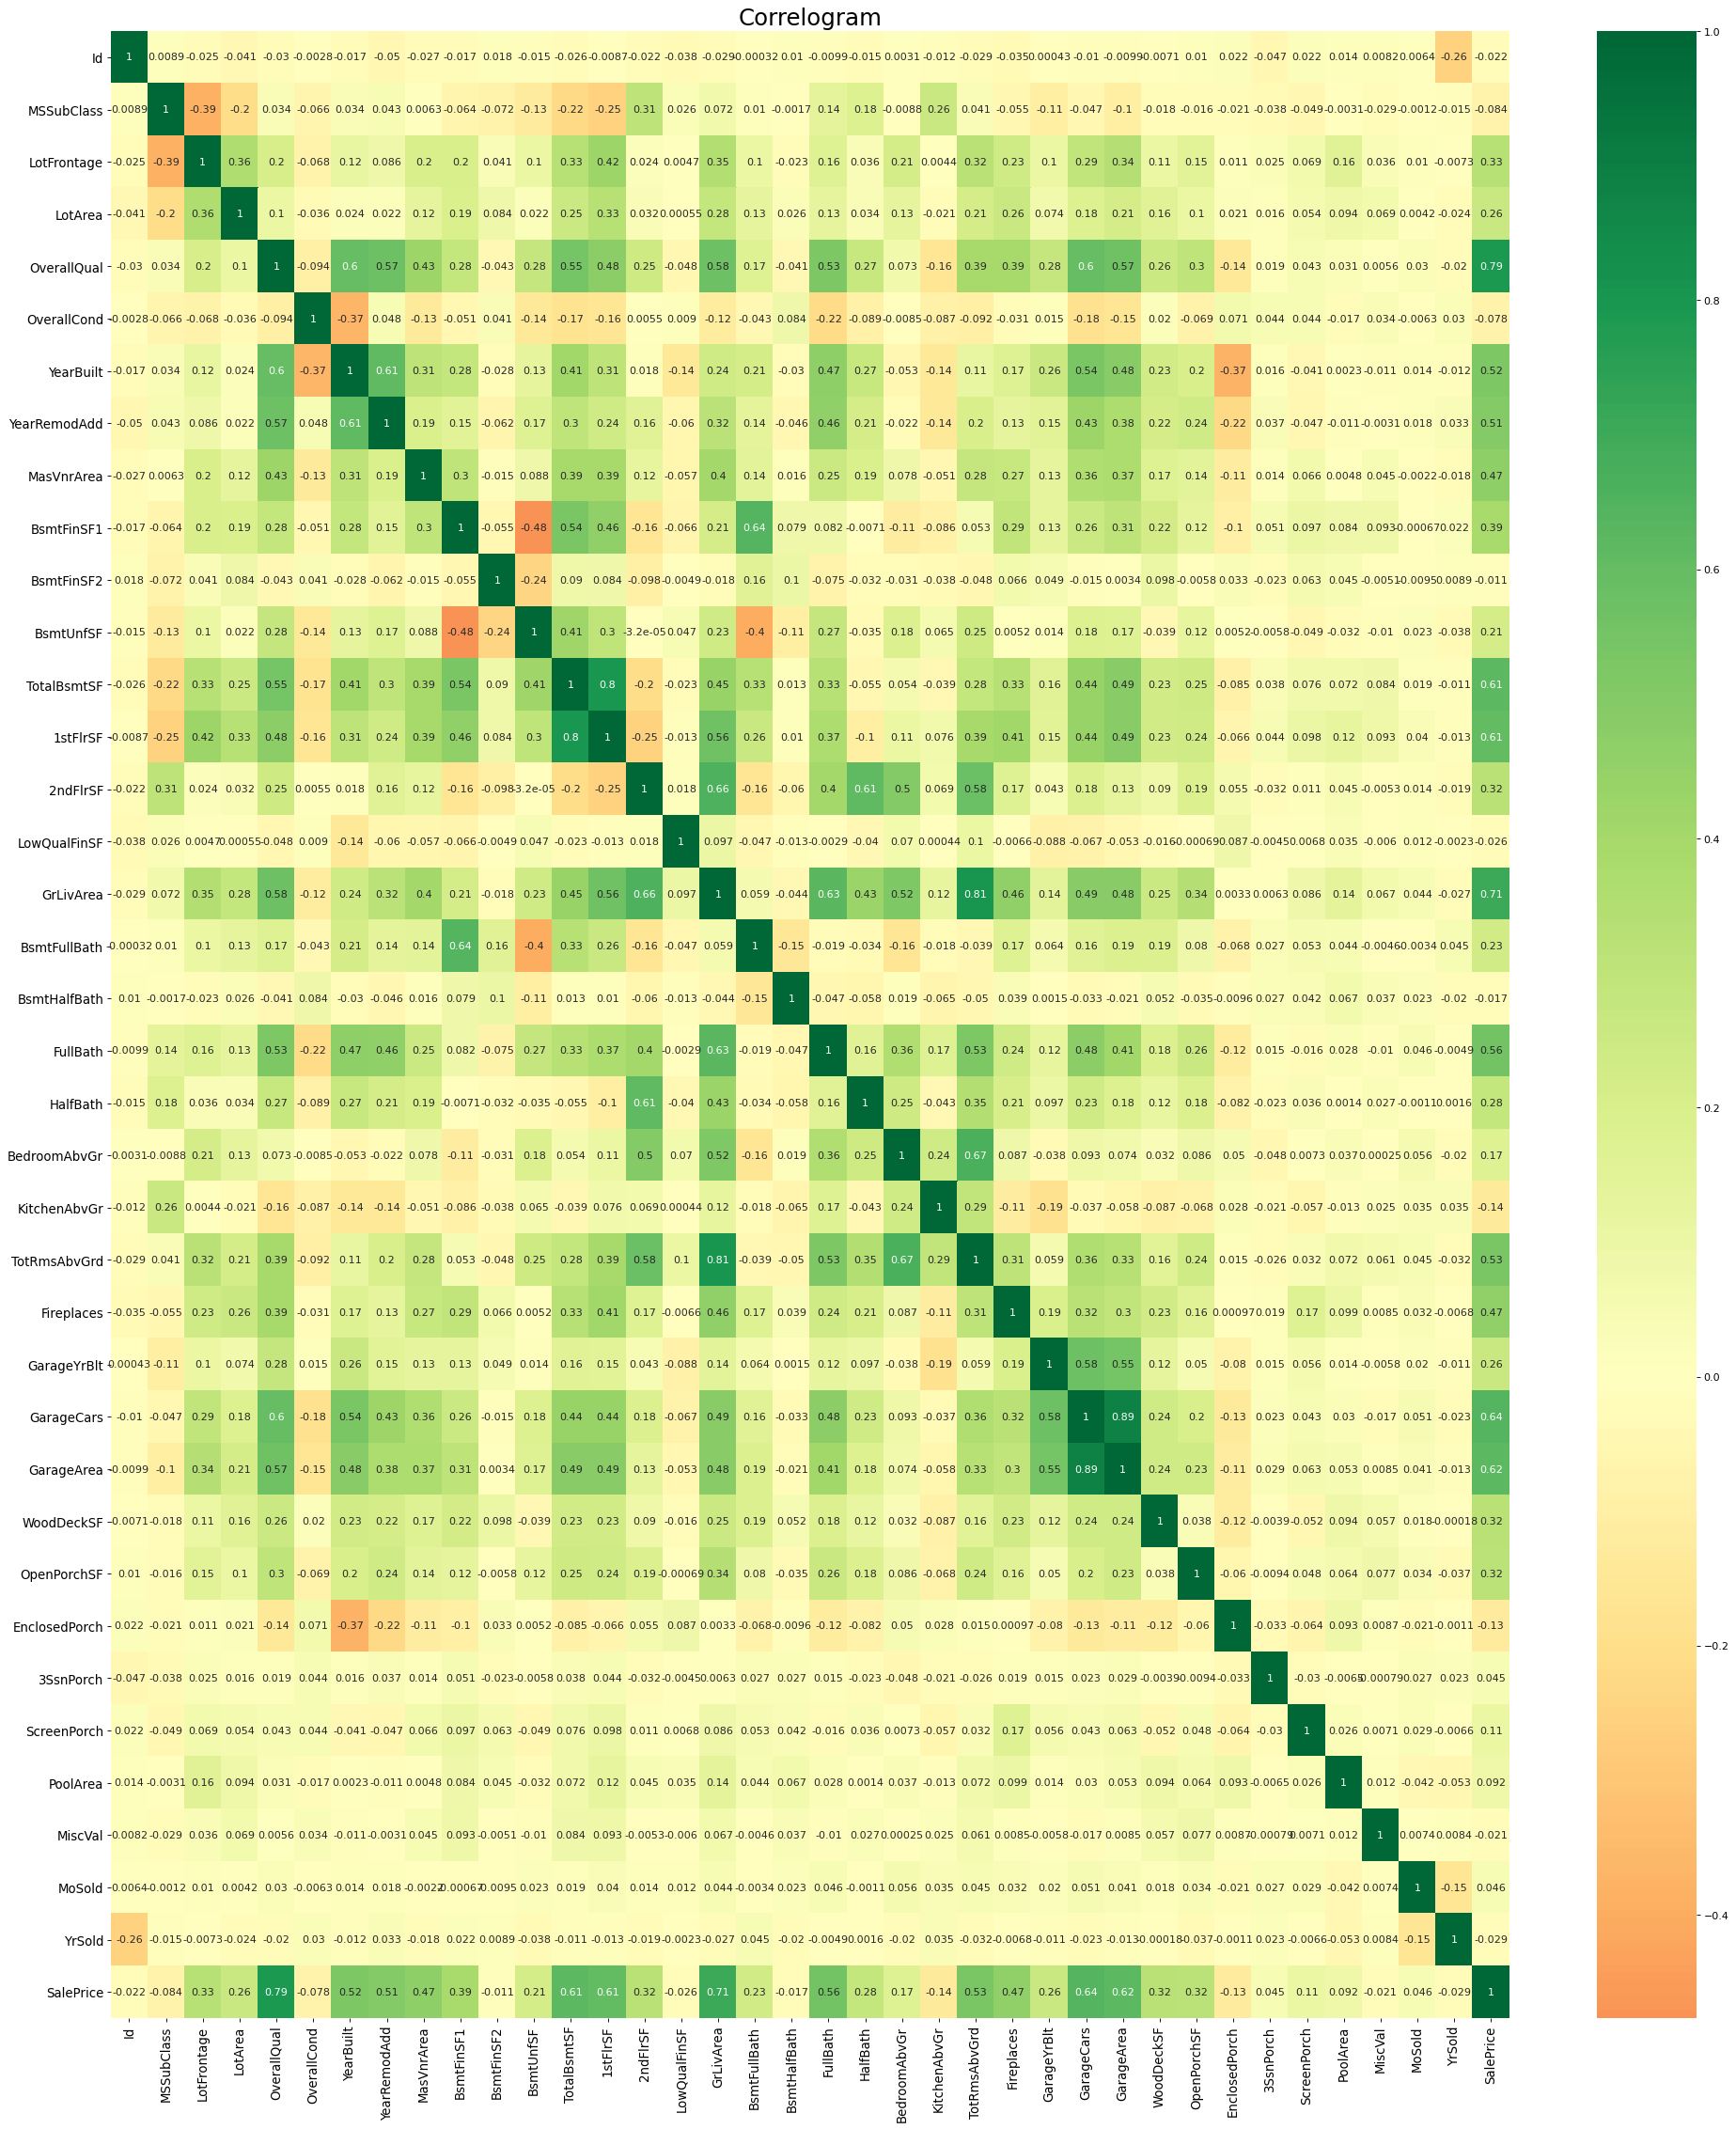

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot
plt.figure(figsize=(30,35), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [18]:
def multiple_box_graph(data_frame):
    column_int = []
    for i in data_frame.columns:
        # type'lar için önce verisetindeki types kontrol edilmeli ve bütün int'ler or ile eklenmeli.
        if data_frame[i].dtypes == "int64" or data_frame[i].dtypes == "float64":
            column_int.append(i)
    for i, col in enumerate(column_int):
        plt.figure(i)
        sns.boxplot(data_frame[col])
        plt.title(col)

<ipython-input-18-3f357c1a5eb3>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)
<ipython-input-18-3f357c1a5eb3>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)
<ipython-input-18-3f357c1a5eb3>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)
<ipython-input-18-3f357c1a5eb3>:8: Runti

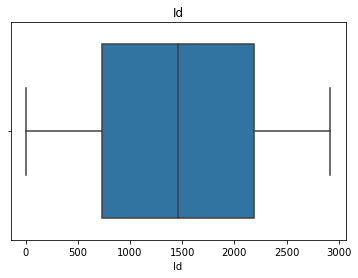

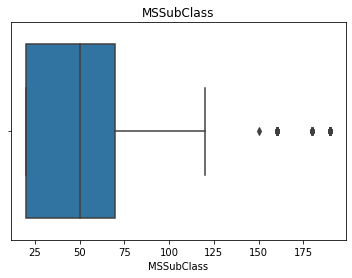

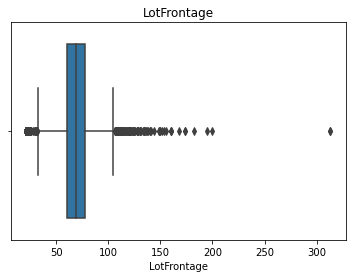

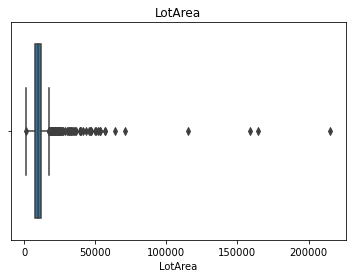

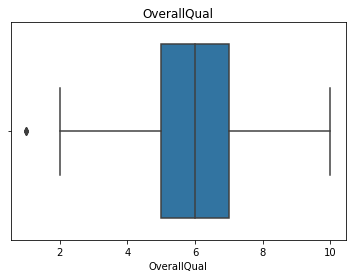

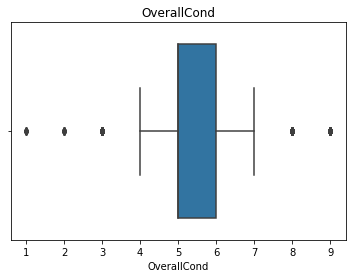

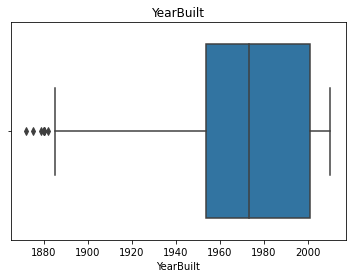

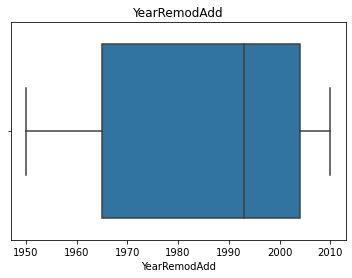

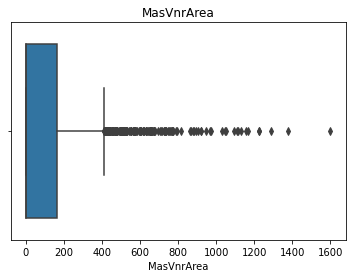

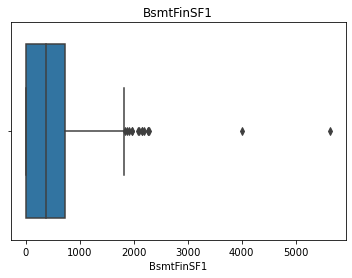

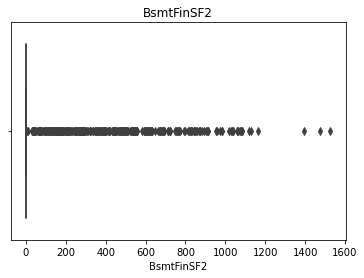

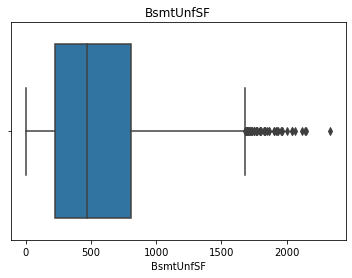

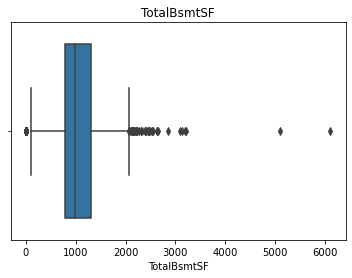

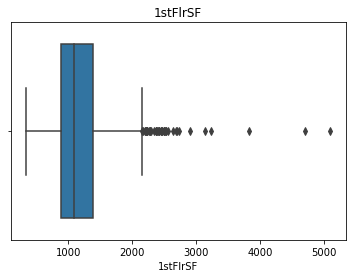

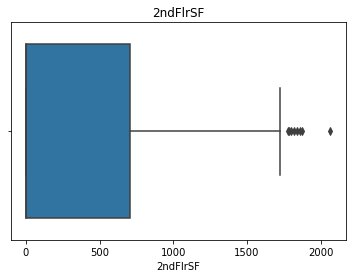

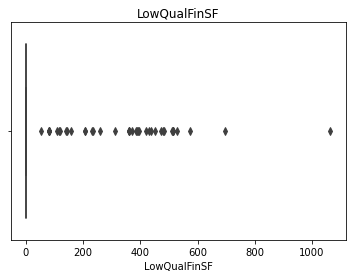

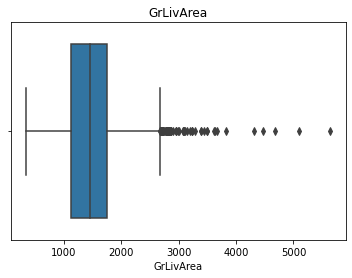

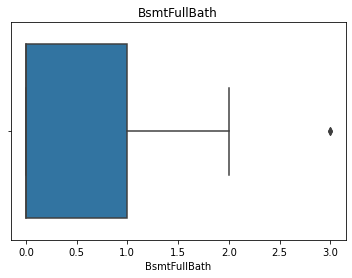

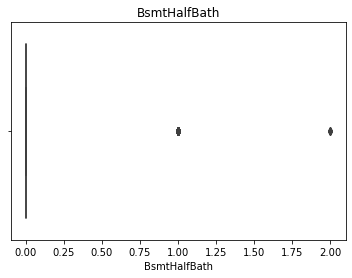

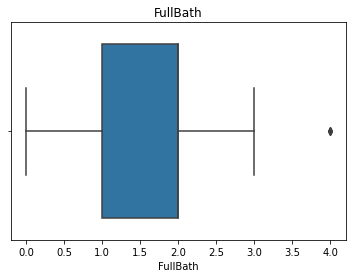

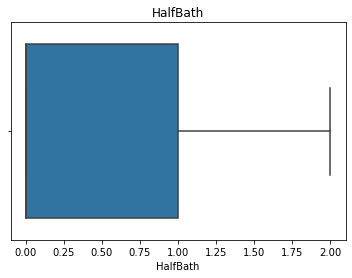

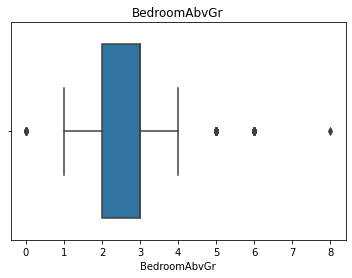

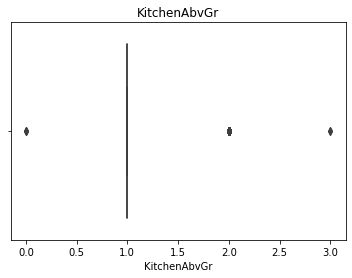

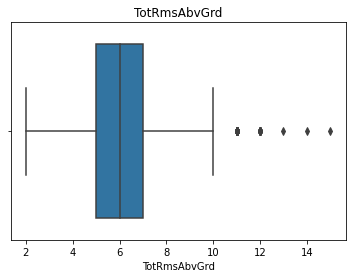

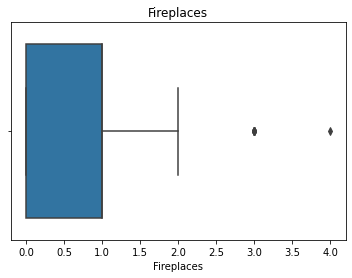

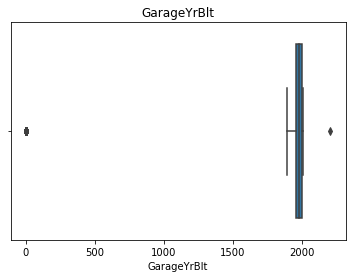

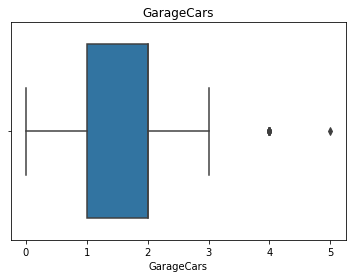

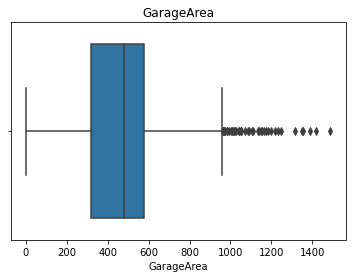

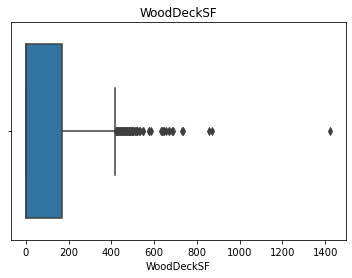

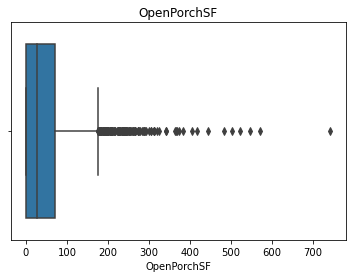

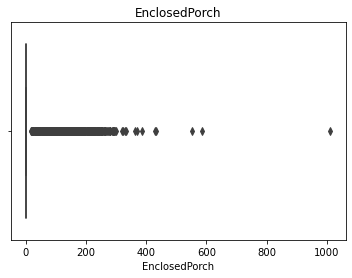

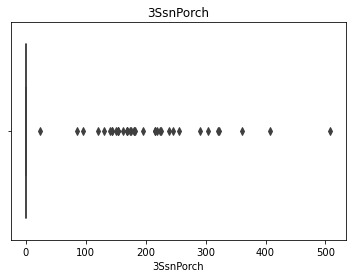

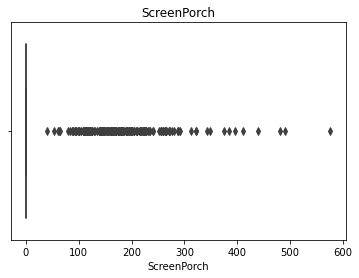

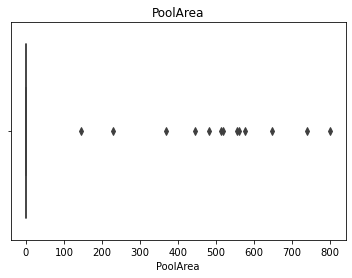

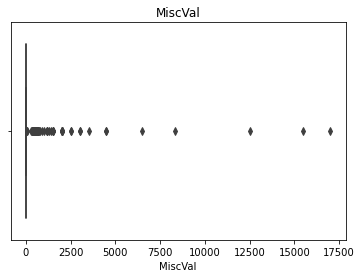

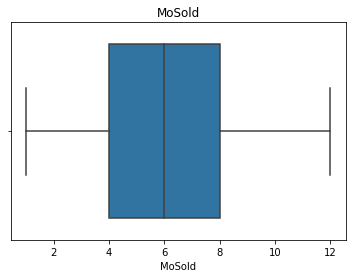

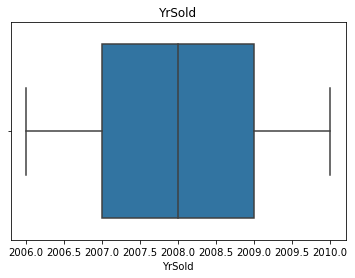

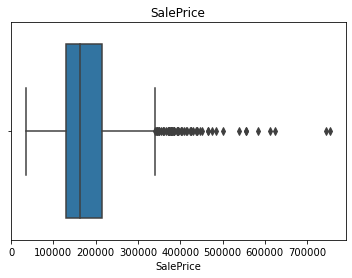

In [19]:
multiple_box_graph(df)

In [20]:
#Veri setinde int olan değişkenler için döngü ile çoklu histogram grafiği çizdirir. Normalliklerine göz atmak için.
def multiple_hist_graph(data_frame):
    column_int = []
    for i in data_frame.columns:
        if data_frame[i].dtypes == "int64" or data_frame[i].dtypes == "float64":
            column_int.append(i)
    for i, col in enumerate(column_int):
        plt.figure(i)
        sns.distplot(data_frame[col])
        plt.title(col)

C:\Users\tugberk\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\tugberk\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\tugberk\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
<ipython-input-20-1b8e0d945191>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)
<ipython-input-20-1b8e0d945191>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot int

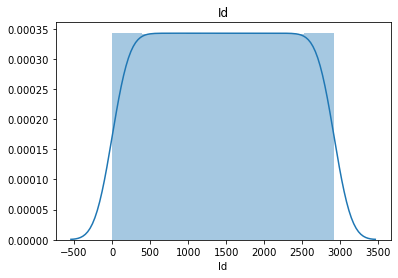

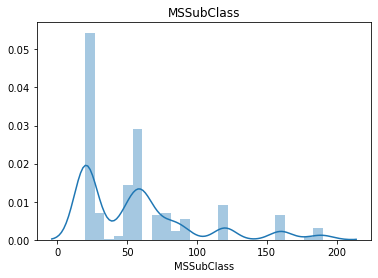

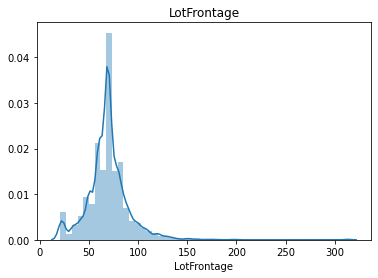

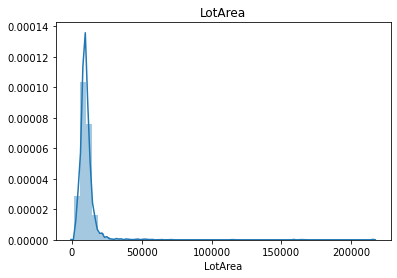

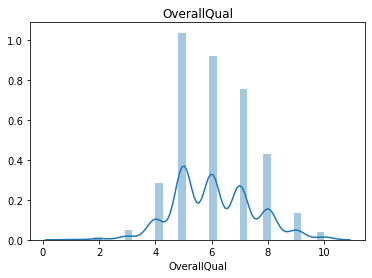

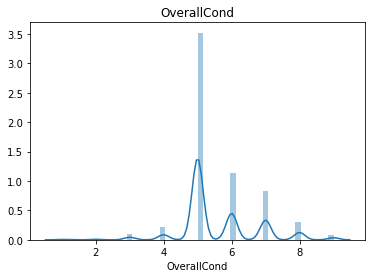

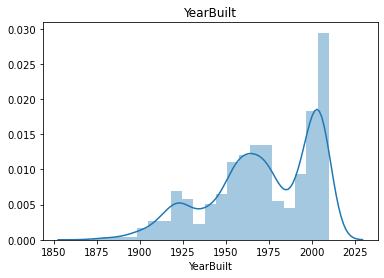

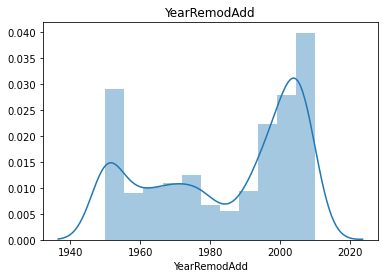

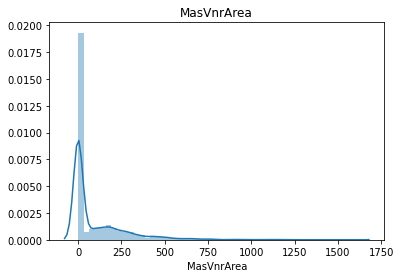

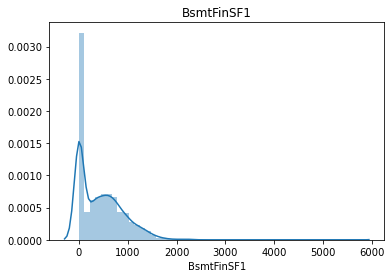

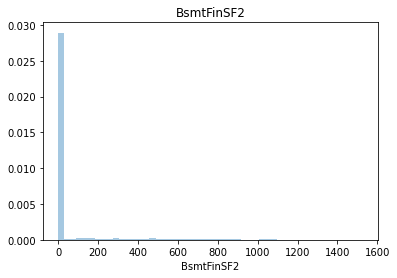

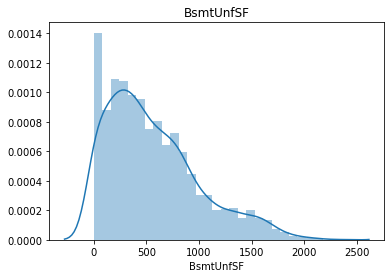

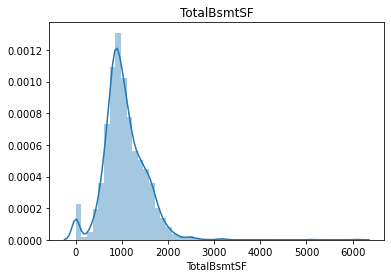

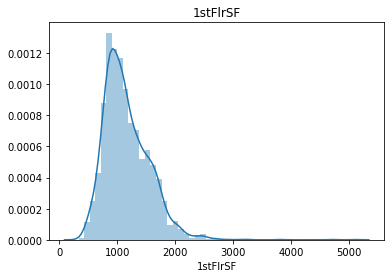

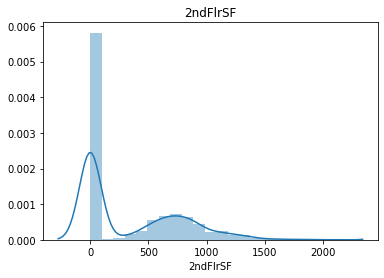

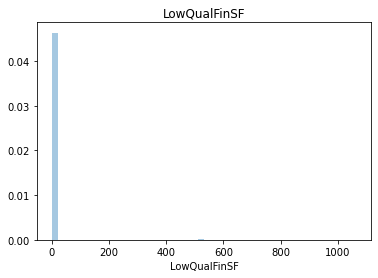

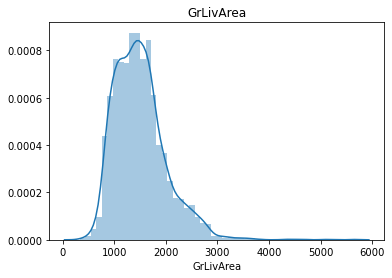

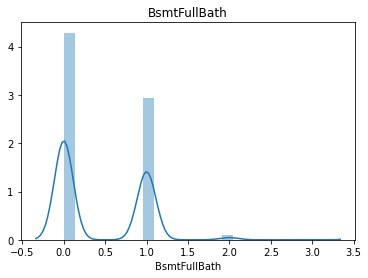

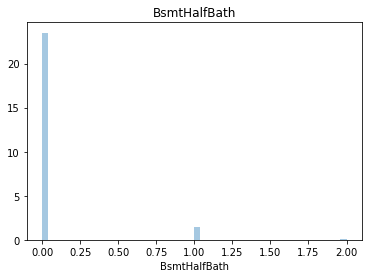

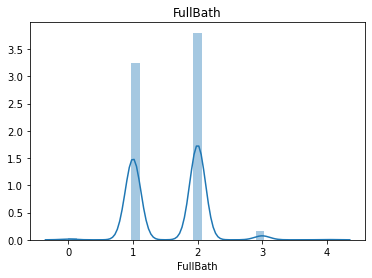

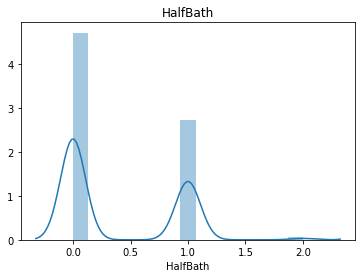

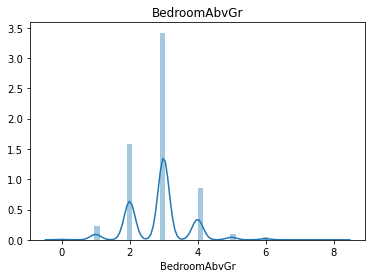

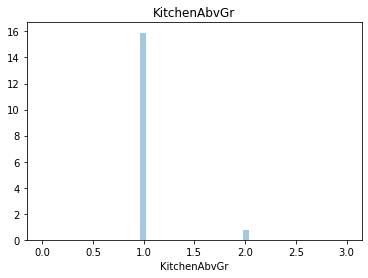

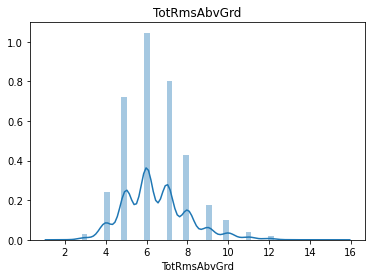

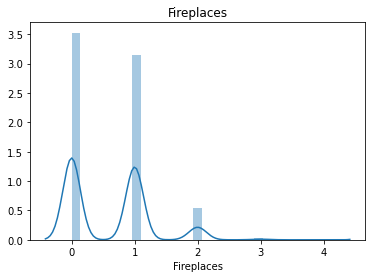

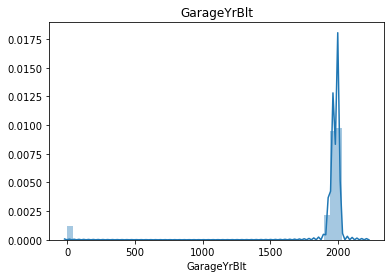

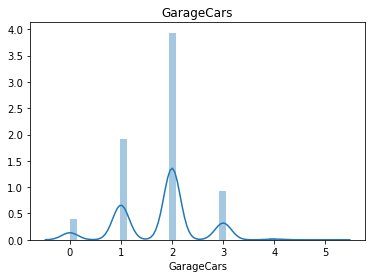

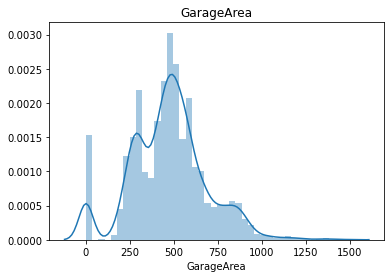

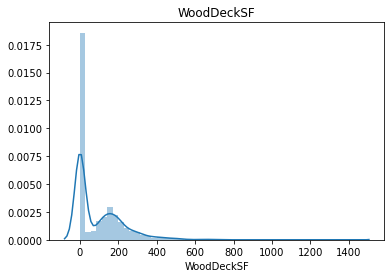

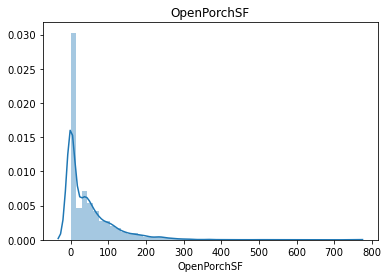

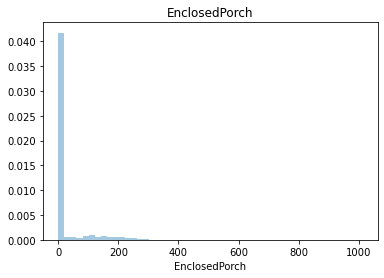

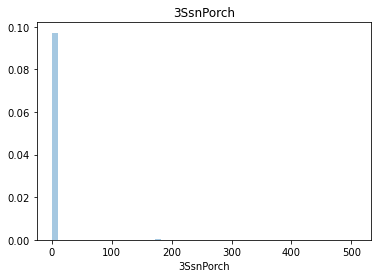

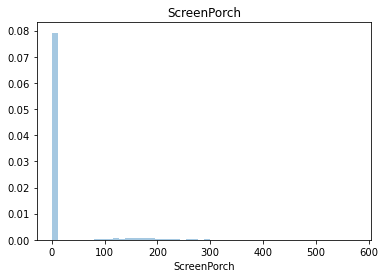

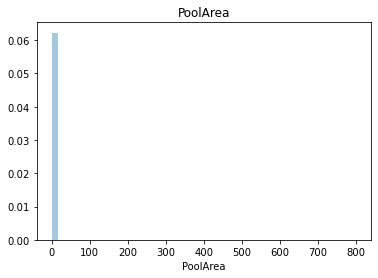

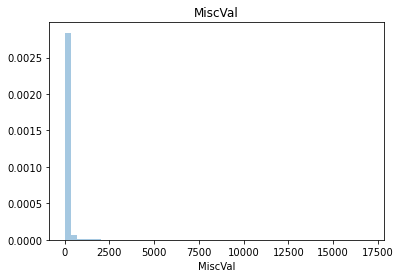

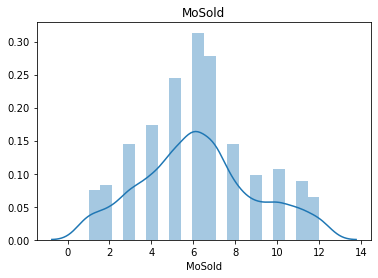

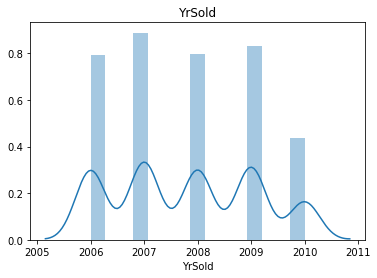

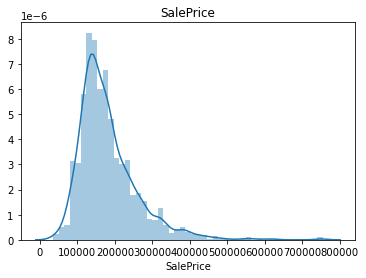

In [21]:
multiple_hist_graph(df)

# Preprocessing


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2919 non-null   object 
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [23]:
df_nominal = []
for i in df.columns:
    if (df[i].dtype == 'object' and i != 'SalePrice'):
        df_nominal.append(i)

In [27]:
df_nominal

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [24]:
from sklearn.preprocessing import OrdinalEncoder

In [25]:
df_new = pd.get_dummies(df[df_nominal], drop_first=True)

In [30]:
df = pd.concat([df,df_new], axis = 1)
df.drop(df_nominal, axis=1, inplace = True)

# Split Data

In [31]:
train = df[:1460].copy()
test = df[1460:].copy()
test.drop('SalePrice', axis = 1, inplace =True)
print(train.shape)
print(test.shape)

(1460, 243)
(1459, 242)


In [48]:
y_train = train['SalePrice']
X_train = train.drop(['SalePrice','Id'], axis = 1)
X_test = test.drop(['Id'], axis = 1)


In [49]:
from xgboost import XGBRegressor

In [50]:
regressor = XGBRegressor(verbosity=0)
regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=0)

In [51]:
score = regressor.score(X_train, y_train)  

print("Training score: ", score)

Training score:  0.9993683088480664


In [94]:
testpred = regressor.predict(X_test)


In [103]:
id = test['Id'].values

In [111]:
results = pd.DataFrame([id,testpred])

In [112]:
results_ = results.T

In [113]:
results_.columns = ['Id','SalePrice']

In [114]:
results_.head()

,Id,SalePrice
0,1461.0,125052.250000
1,1462.0,161308.968750
2,1463.0,173797.843750
3,1464.0,191599.312500
4,1465.0,178228.828125


In [120]:
results_.Id=results_.Id.astype('int32')

In [121]:
results_.to_csv('prediction.csv',index=False)

In [122]:
results_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int32  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int32(1)
memory usage: 17.2 KB
